# Lending Club project

In [2]:
import pandas as pd
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import multiprocessing

%matplotlib inline

## Loading Data

In [3]:
data = pd.read_csv('loansData.csv')
data.head(5)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174,20000,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,99592,19200,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,80059,35000,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,15825,10000,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,33182,12000,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [4]:
data['FICO.score.low'] = pd.to_numeric(data['FICO.Range'].str.split('-').str[0])
data['FICO.score.high'] = pd.to_numeric(data['FICO.Range'].str.split('-').str[1])
data['FICO.score'] = (data['FICO.score.high'] + data['FICO.score.low'])/2
data['Interest.Rate'] = data['Interest.Rate'].str.replace('%','').astype(np.float64)

In [5]:
df =  data[['Amount.Requested','Amount.Funded.By.Investors','Interest.Rate','FICO.score']]
df.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,FICO.score
0,20000,20000.0,8.90,737.0
1,19200,19200.0,12.12,717.0
2,35000,35000.0,21.98,692.0
3,10000,9975.0,9.99,697.0
4,12000,12000.0,11.71,697.0


In [6]:
df.describe()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,FICO.score
count,2500.000000,2500.000000,2500.000000,2500.000000
mean,12406.500000,12001.573236,13.066996,707.888000
std,7801.544872,7745.320754,4.178230,35.033161
min,1000.000000,-0.010000,5.420000,642.000000
25%,6000.000000,6000.000000,10.160000,682.000000
50%,10000.000000,10000.000000,13.110000,702.000000
75%,17000.000000,16000.000000,15.800000,727.000000
max,35000.000000,35000.000000,24.890000,832.000000


<h2> 1.	Write a function called logistic_function that will take a FICO Score and a Loan Amount of this linear predictor, and return p. </h2>

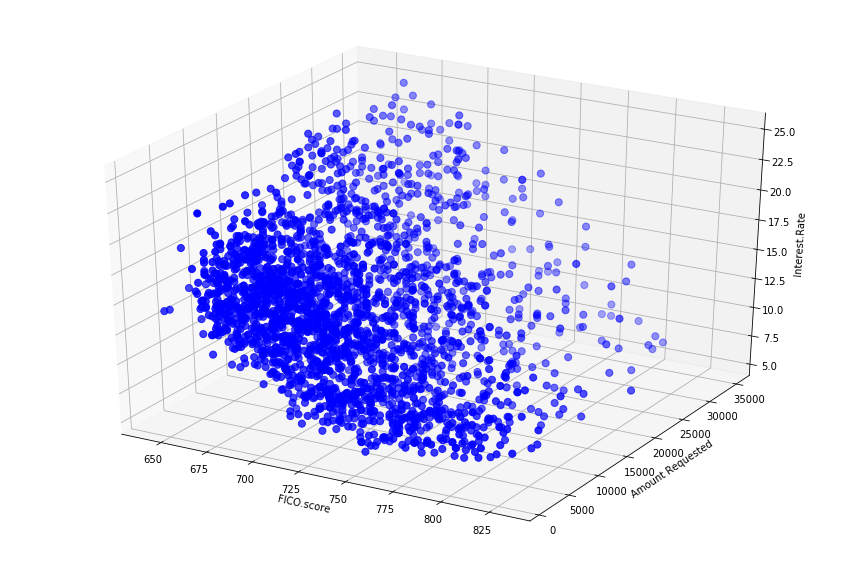

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['FICO.score'], df['Amount.Requested'],  df['Interest.Rate'], 
           s=50, c='blue')
ax.set_xlabel('FICO.score')
ax.set_ylabel('Amount Requested')
ax.set_zlabel('Interest.Rate')
plt.show()

In [8]:
X = df[['Amount.Requested', 'FICO.score']]
Y = df['Interest.Rate']
lr = linear_model.LinearRegression()
model = lr.fit(X,Y)
m = model.coef_
b = model.intercept_
print(m,b)

[ 0.00021075 -0.08844242] 73.0596831611


In [9]:
def logistic_function(loan_amount,fico_score, m0,m1, b):
    y = b + m0*loan_amount + m1*fico_score 
    p = 1./(1.+np.exp(-y))
    return p

In [10]:
p1 = logistic_function(10000, 750, m[0],m[1],b)
print("Probability that we can obtain a loan for $10,000 with a FICO score of 720")
print("p = ", p1)

Probability that we can obtain a loan for $10,000 with a FICO score of 720
p =  0.999854522584


In [11]:
model.predict([10000,750])

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 8.83534421])

In [12]:
print("Mean squared error: %.2f"
      % np.mean((model.predict(X) - Y) ** 2))

Mean squared error: 5.99


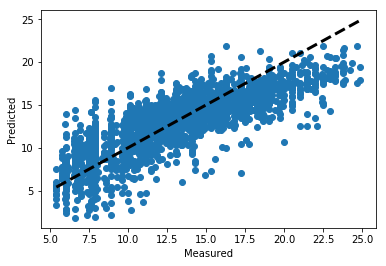

In [13]:
predicted = cross_val_predict(lr, X, Y,cv = 10)
fig1, ax1 = plt.subplots()
ax1.scatter(Y, predicted)
ax1.plot([Y.min(), Y.max()], [Y.min(), Y.max()], 'k--', lw=3)
ax1.set_xlabel('Measured')
ax1.set_ylabel('Predicted')
plt.show()

<h3> 2.	Determine the probability that we can obtain a loan at ≤12% Interest for $10,000 with a FICO score of 720 using this function. </h3>

In [14]:
df['class'] = 0
df.loc[df['Interest.Rate'] <= 12,'class'] = 1
df.head()

C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\LeTrongTinh\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,FICO.score,class
0,20000,20000.0,8.90,737.0,1
1,19200,19200.0,12.12,717.0,0
2,35000,35000.0,21.98,692.0,0
3,10000,9975.0,9.99,697.0,1
4,12000,12000.0,11.71,697.0,1


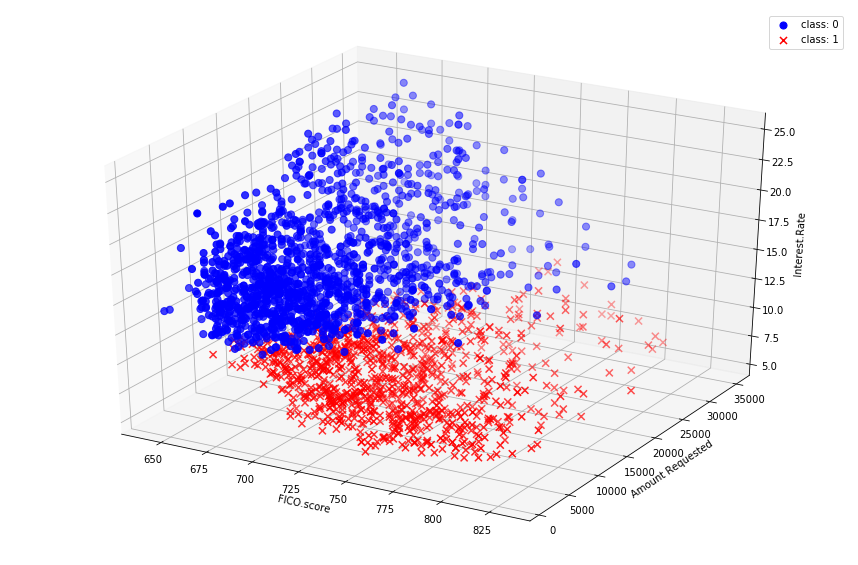

In [15]:
class0 = df[df['class'].isin([0])]
class1 = df[df['class'].isin([1])]

fig2 = plt.figure(figsize=(15,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(class0['FICO.score'], class0['Amount.Requested'], class0['Interest.Rate'], marker='o',
           s=50, c='b', label ='class: 0')
ax2.scatter(class1['FICO.score'], class1['Amount.Requested'], class1['Interest.Rate'], marker='x',
           s=50, c='r', label ='class: 1')
ax2.set_xlabel('FICO.score')
ax2.set_ylabel('Amount Requested')
ax2.set_zlabel('Interest.Rate')
ax2.legend()
plt.show()


In [16]:
train=df.sample(frac=0.7,random_state=200)
test=df.drop(train.index)

In [17]:
log = linear_model.LogisticRegression(C=1e5)
X1 = train[['Amount.Requested', 'FICO.score']]
Y1 = train['class']
model1 = log.fit(X1,Y1)
m1 = model1.coef_
b1 = model1.intercept_
print(m1,b1)

[[ -7.61669100e-05   7.13658425e-04]] [-0.00052151]


In [18]:
model1.predict([[10000,750]])

array([0], dtype=int64)

In [19]:
model1.predict_proba([[10000,750]])

array([[ 0.55649443,  0.44350557]])

In [20]:
test['predict']=model1.predict(test[['Amount.Requested','FICO.score']])
test['pos_diff']=test['class']+ test['predict']

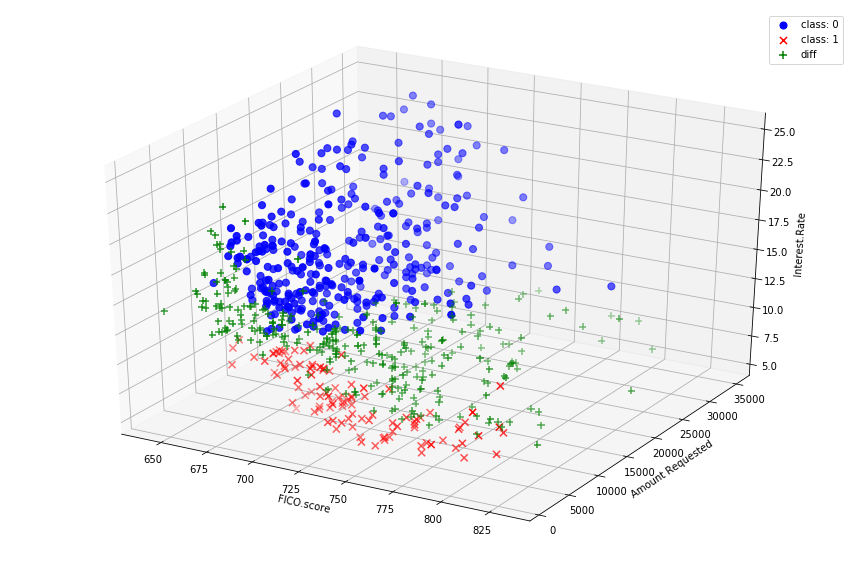

In [21]:
p_class0 = test[test['pos_diff'].isin([0])]  
p_class1 = test[test['pos_diff'].isin([2])]
p_diff = test[test['pos_diff'].isin([1])]

fig2 = plt.figure(figsize=(15,10))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(p_class0['FICO.score'], p_class0['Amount.Requested'], p_class0['Interest.Rate'], 
            marker='o', s=50, c='b', label ='class: 0')
ax2.scatter(p_class1['FICO.score'], p_class1['Amount.Requested'], p_class1['Interest.Rate'],
            marker='x', s=50, c='r', label ='class: 1')
ax2.scatter(p_diff['FICO.score'], p_diff['Amount.Requested'], p_diff['Interest.Rate'], 
            marker='+', s=50, c='g', label ='diff')
ax2.set_xlabel('FICO.score')
ax2.set_ylabel('Amount Requested')
ax2.set_zlabel('Interest.Rate')
ax2.legend()
plt.show()


In [22]:
X1_test = test[['Amount.Requested', 'FICO.score']]
Y1_test = test['class']
predicted1= cross_val_predict(log, X1_test, Y1_test, cv=10)
print (classification_report(Y1_test, predicted1))

             precision    recall  f1-score   support

          0       0.63      0.68      0.65       435
          1       0.50      0.45      0.47       315

avg / total       0.58      0.58      0.58       750

